<a href="https://colab.research.google.com/github/abhinavsharma2471716/dataset/blob/master/myNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv("https://raw.githubusercontent.com/abhinavsharma2471716/dataset/master/Benign2.csv",sep=',', error_bad_lines=False, dtype='unicode')
df.head()


,Unnamed: 0,Unnamed: 0.1,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3931607537604581,2601295.4318181816,4295632.000149808,10001143.0,1.0,114456999.0,2601295.4318181816,4295632.000149808,10001143.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,45,0,0,0,-1,-1,0,0,8185.583333333334,28337.112287786236,98168.0,3.0,9529897.25,351582.63126924314,10001143.0,9048097.0,0,0,BENIGN
1,1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4897352197560867,2079045.527272728,3956754.0866650236,9978130.0,0.0,114347504.0,2079045.527272728,3956754.0866650236,9978130.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,56,0,0,0,-1,-1,0,0,35028.416666666664,121314.91186499133,420255.0,4.0,9493929.749999998,351541.07953904505,9978130.0,8820294.0,0,0,BENIGN
2,2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,2,116.0,92.0,46.0,6.0,19.33333333333333,20.65591117977289,46.0,46.0,46.0,0.0,5.7087223761305355,0.21956624523578985,5205067.571428571,13743800.166986987,36373056.0,1.0,36435473.0,7287094.6,16259569.179524446,36373056.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,...,21.0818510677892,444.4444444444445,0,0,1,0,0,1,0,0,0.0,31.75,19.33333333333333,46.0,120,0,0,0,0,0,0,6,116,2,92,257,250,5,20,62416.0,0.0,62416.0,62416.0,36373056.0,0.0,36373056.0,36373056.0,0,0,BENIGN
3,3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,2,116.0,92.0,46.0,6.0,19.33333333333333,20.65591117977289,46.0,46.0,46.0,0.0,5.7088427091697325,0.2195708734296051,5204957.857142856,13743511.107713118,36372291.0,1.0,36434705.0,7286941.0,16259227.39484707,36372291.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,...,21.0818510677892,444.4444444444445,0,0,1,0,0,1,0,0,0.0,31.75,19.33333333333333,46.0,120,0,0,0,0,0,0,6,116,2,92,253,252,5,20,62413.0,0.0,62413.0,62413.0,36372291.0,0.0,36372291.0,36372291.0,0,0,BENIGN
4,4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,2,116.0,92.0,46.0,6.0,19.33333333333333,20.65591117977289,46.0,46.0,46.0,0.0,5.708855087465423,0.2195713495179009,5204946.571428572,13743483.22141249,36372216.0,1.0,36434626.0,7286925.2,16259194.256976502,36372216.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,...,21.0818510677892,444.4444444444445,0,0,1,0,0,1,0,0,0.0,31.75,19.33333333333333,46.0,120,0,0,0,0,0,0,6,116,2,92,257,246,5,20,62409.0,0.0,62409.0,62409.0,36372216.0,0.0,36372216.0,36372216.0,0

In [29]:
dict ={
"Syn":[' Flow Duration',' Fwd IAT Total',' ACK Flag Count',' Init_Win_bytes_forward',' min_seg_size_forward'],
"MSSQL":[' Protocol',' Fwd Packets/s'],
"BENIGN":[' Fwd Packet Length Std',' Flow IAT Min',' Packet Length Std',' ACK Flag Count','Init_Win_bytes_forward'],
"UDP":[' Destination Port',' Protocol',' Fwd Packet Length Std',' Packet Length Std',' min_seg_size_forward',' Label'],
"LDAP":[' Fwd Packet Length Max',' Fwd Packet Length Min',' Min Packet Length',' Max Packet Length',' Average Packet Size'],
"NETBIOS":[' Protocol',' Fwd Header Length',' Fwd Packets/s',' Fwd Header Length.1',' min_seg_size_forward']
}

import pandas as pd
pd.__version__

df=pd.read_csv("https://raw.githubusercontent.com/abhinavsharma2471716/dataset/master/Benign2.csv")

attack_type=df[' Label'].iloc[0]


In [30]:
X = pd.read_csv("https://raw.githubusercontent.com/abhinavsharma2471716/dataset/master/Benign2.csv",usecols=dict[attack_type])
y =df.iloc[:,-1] 
print(X)

       Fwd Packet Length Std  ...  Init_Win_bytes_forward
0                   0.000000  ...                      -1
1                   0.000000  ...                      -1
2                  20.655911  ...                     257
3                  20.655911  ...                     253
4                  20.655911  ...                     257
...                      ...  ...                     ...
4729                0.000000  ...                      -1
4730                0.000000  ...                      -1
4731               17.677670  ...                   16387
4732                0.000000  ...                     119
4733                0.000000  ...                     119

[4734 rows x 5 columns]


In [31]:
import numpy as np
classes = np.unique(y)
print(classes)

['BENIGN']


In [32]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) # 70% training and 30% test

In [33]:

from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier(n_estimators=100)
rs.fit(X_train,y_train)
# print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))
y_pred=rs.predict(X_test)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [35]:
import pandas as pd
feature_imp = pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False)
feature_imp

min_seg_size_forward      0.0
Init_Win_bytes_forward    0.0
ACK Flag Count            0.0
Fwd IAT Total             0.0
Flow Duration             0.0
dtype: float64

No handles with labels found to put in legend.


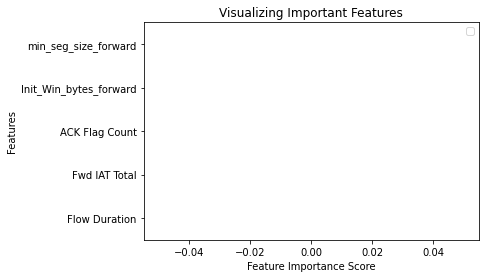

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()